In [1]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import strategy_imitation, sarsa, ddqn, random_agent, a2c, model_based
import aa_gun
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [ ]:
#массовый тест моделей

_____ mb 0 2020-01-30 18:00:07.028938
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 260)               5200      
_________________________________________________________________
batch_normalization_1 (Batch (None, 260)               1040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 260)               67860     
_________________________________________________________________
batch_normalization_2 (Batch (None, 260)               1040      
_________________________________________________________________
dropout_2 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_3 (Dense) 

Epoch 50/60
1000/1000 [==============================] - 0s 19us/step - loss: 7715.9663
Epoch 51/60
1000/1000 [==============================] - 0s 19us/step - loss: 7719.3296
Epoch 52/60
1000/1000 [==============================] - 0s 32us/step - loss: 7702.8306
Epoch 53/60
1000/1000 [==============================] - 0s 28us/step - loss: 7684.5669
Epoch 54/60
1000/1000 [==============================] - 0s 20us/step - loss: 7677.8013
Epoch 55/60
1000/1000 [==============================] - 0s 19us/step - loss: 7661.6323
Epoch 56/60
1000/1000 [==============================] - 0s 19us/step - loss: 7640.5933
Epoch 57/60
1000/1000 [==============================] - 0s 20us/step - loss: 7633.1650
Epoch 58/60
1000/1000 [==============================] - 0s 19us/step - loss: 7618.4863
Epoch 59/60
1000/1000 [==============================] - 0s 20us/step - loss: 7607.1919
Epoch 60/60
1000/1000 [==============================] - 0s 19us/step - loss: 7587.4375
Epoch 1/60
1000/1000 [==========

Epoch 24/60
1000/1000 [==============================] - 0s 20us/step - loss: 6360.0459
Epoch 25/60
1000/1000 [==============================] - 0s 19us/step - loss: 6336.6821
Epoch 26/60
1000/1000 [==============================] - 0s 20us/step - loss: 6335.4609
Epoch 27/60
1000/1000 [==============================] - 0s 19us/step - loss: 6318.6934
Epoch 28/60
1000/1000 [==============================] - 0s 20us/step - loss: 6292.0757
Epoch 29/60
1000/1000 [==============================] - 0s 20us/step - loss: 6293.5054
Epoch 30/60
1000/1000 [==============================] - 0s 19us/step - loss: 6278.7783
Epoch 31/60
1000/1000 [==============================] - 0s 18us/step - loss: 6273.2090
Epoch 32/60
1000/1000 [==============================] - 0s 18us/step - loss: 6228.6050
Epoch 33/60
1000/1000 [==============================] - 0s 19us/step - loss: 6218.7397
Epoch 34/60
1000/1000 [==============================] - 0s 21us/step - loss: 6205.8545
Epoch 35/60
1000/1000 [=========

Epoch 58/60
1000/1000 [==============================] - 0s 19us/step - loss: 4926.0093
Epoch 59/60
1000/1000 [==============================] - 0s 17us/step - loss: 4928.1631
Epoch 60/60
1000/1000 [==============================] - 0s 19us/step - loss: 4907.3203
Epoch 1/60
1000/1000 [==============================] - 0s 19us/step - loss: 4903.6211
Epoch 2/60
1000/1000 [==============================] - 0s 21us/step - loss: 4856.6748
Epoch 3/60
1000/1000 [==============================] - 0s 22us/step - loss: 4855.6519
Epoch 4/60
1000/1000 [==============================] - 0s 21us/step - loss: 4828.8340
Epoch 5/60
1000/1000 [==============================] - 0s 21us/step - loss: 4832.9546
Epoch 6/60
1000/1000 [==============================] - 0s 21us/step - loss: 4814.4395
Epoch 7/60
1000/1000 [==============================] - 0s 22us/step - loss: 4806.3101
Epoch 8/60
1000/1000 [==============================] - 0s 19us/step - loss: 4787.9106
Epoch 9/60
1000/1000 [==================

Epoch 32/60
1000/1000 [==============================] - 0s 20us/step - loss: 3485.6733
Epoch 33/60
1000/1000 [==============================] - 0s 20us/step - loss: 3468.4216
Epoch 34/60
1000/1000 [==============================] - 0s 21us/step - loss: 3433.4495
Epoch 35/60
1000/1000 [==============================] - 0s 19us/step - loss: 3426.7861
Epoch 36/60
1000/1000 [==============================] - 0s 19us/step - loss: 3405.8889
Epoch 37/60
1000/1000 [==============================] - 0s 18us/step - loss: 3402.8311
Epoch 38/60
1000/1000 [==============================] - 0s 19us/step - loss: 3390.9873
Epoch 39/60
1000/1000 [==============================] - 0s 19us/step - loss: 3400.9065
Epoch 40/60
1000/1000 [==============================] - 0s 20us/step - loss: 3359.0117
Epoch 41/60
1000/1000 [==============================] - 0s 18us/step - loss: 3373.7024
Epoch 42/60
1000/1000 [==============================] - 0s 21us/step - loss: 3347.4890
Epoch 43/60
1000/1000 [=========

Epoch 6/60
1000/1000 [==============================] - 0s 21us/step - loss: 2221.4009
Epoch 7/60
1000/1000 [==============================] - 0s 21us/step - loss: 2250.0156
Epoch 8/60
1000/1000 [==============================] - 0s 22us/step - loss: 2227.8713
Epoch 9/60
1000/1000 [==============================] - 0s 20us/step - loss: 2206.8699
Epoch 10/60
1000/1000 [==============================] - 0s 22us/step - loss: 2196.1675
Epoch 11/60
1000/1000 [==============================] - 0s 21us/step - loss: 2179.2463
Epoch 12/60
1000/1000 [==============================] - 0s 18us/step - loss: 2175.1353
Epoch 13/60
1000/1000 [==============================] - 0s 18us/step - loss: 2148.9426
Epoch 14/60
1000/1000 [==============================] - 0s 26us/step - loss: 2151.5413
Epoch 15/60
1000/1000 [==============================] - 0s 35us/step - loss: 2127.0762
Epoch 16/60
1000/1000 [==============================] - 0s 47us/step - loss: 2131.8599
Epoch 17/60
1000/1000 [=============

Epoch 40/60
1000/1000 [==============================] - 0s 19us/step - loss: 1403.0314
Epoch 41/60
1000/1000 [==============================] - 0s 21us/step - loss: 1427.3289
Epoch 42/60
1000/1000 [==============================] - 0s 18us/step - loss: 1379.6509
Epoch 43/60
1000/1000 [==============================] - 0s 18us/step - loss: 1416.4226
Epoch 44/60
1000/1000 [==============================] - 0s 19us/step - loss: 1396.4468
Epoch 45/60
1000/1000 [==============================] - 0s 20us/step - loss: 1374.8928
Epoch 46/60
1000/1000 [==============================] - 0s 19us/step - loss: 1381.0424
Epoch 47/60
1000/1000 [==============================] - 0s 19us/step - loss: 1387.6753
Epoch 48/60
1000/1000 [==============================] - 0s 20us/step - loss: 1351.0612
Epoch 49/60
1000/1000 [==============================] - 0s 18us/step - loss: 1375.7112
Epoch 50/60
1000/1000 [==============================] - 0s 18us/step - loss: 1341.7166
Epoch 51/60
1000/1000 [=========

Epoch 2/2
1000/1000 [==============================] - 0s 19us/step - loss: 1032.1705
Epoch 1/2
1000/1000 [==============================] - 0s 17us/step - loss: 1021.6355
Epoch 2/2
1000/1000 [==============================] - 0s 18us/step - loss: 1037.9829
Epoch 1/2
1000/1000 [==============================] - 0s 19us/step - loss: 1032.2831
Epoch 2/2
1000/1000 [==============================] - 0s 18us/step - loss: 1026.9916
Epoch 1/2
1000/1000 [==============================] - 0s 18us/step - loss: 1023.2830
Epoch 2/2
1000/1000 [==============================] - 0s 22us/step - loss: 1010.4675
self-test 9.377545032426209
episode: 3   score: 1.5 1.15625   memory length: 1000   epsilon: 0.9048328935585562
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 1035.9513
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 1032.2086
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 996.6159
Epoch 2/2
500/500 [================

Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 718.2630
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 722.4415
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 712.5222
Epoch 1/2
500/500 [==============================] - 0s 40us/step - loss: 737.9534
Epoch 2/2
500/500 [==============================] - 0s 35us/step - loss: 712.9837
Epoch 1/2
500/500 [==============================] - 0s 33us/step - loss: 719.5539
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 724.6958
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 715.9584
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 727.4492
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 749.0878
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 720.6365
self-test 5.833511778830532
Epoch 1/2
500/500 [==============================] - 0s 27u

Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 820.0657
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 762.0042
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 790.8427
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 788.1240
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 806.3213
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 820.0087
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 786.3825
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 765.5168
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 789.0261
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 802.2120
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 779.4175
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 755.8127
Epoc

Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 781.7718
Epoch 1/2
500/500 [==============================] - 0s 31us/step - loss: 734.4630
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 756.2481
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 740.4583
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 761.9942
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 766.2972
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 761.7128
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 732.4626
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 763.9392
Epoch 1/2
500/500 [==============================] - 0s 31us/step - loss: 711.4036
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 705.2115
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 755.9391
Epoc

Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 710.2844
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 663.8998
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 687.5822
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 677.1205
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 647.7288
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 663.6222
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 680.7148
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 680.9432
Epoch 1/2
500/500 [==============================] - 0s 51us/step - loss: 657.4783
Epoch 2/2
500/500 [==============================] - 0s 49us/step - loss: 655.1559
Epoch 1/2
500/500 [==============================] - 0s 40us/step - loss: 656.9602
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 643.3597
Epoc

self-test 3.37832576593886
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 620.7904
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 587.8127
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 589.6728
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 650.3766
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 618.7735
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 605.9387
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 593.4462
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 607.9188
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 595.2168
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 603.6053
Epoch 1/2
500/500 [==============================] - 0s 31us/step - loss: 593.7773
Epoch 2/2
500/500 [==============================] - 0s 35us

500/500 [==============================] - 0s 30us/step - loss: 637.6326
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 635.5195
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 605.7468
self-test 3.8809451739750607
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 729.7952
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 710.5094
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 731.9237
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 694.1666
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 703.9182
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 699.5141
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 696.5037
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 703.6016
Epoch 1/2
500/500 [==============================] - 0s 28us/step - 

500/500 [==============================] - 0s 27us/step - loss: 551.8698
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 532.4229
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 554.3981
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 528.1271
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 534.2161
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 529.0362
self-test 3.034263368743097
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 687.8681
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 689.0182
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 652.6197
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 672.2053
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 658.5350
Epoch 2/2
500/500 [==============================] - 0s 29us/step - l

500/500 [==============================] - 0s 28us/step - loss: 630.8756
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 602.8145
Epoch 2/2
500/500 [==============================] - 0s 32us/step - loss: 644.9983
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 652.9980
Epoch 2/2
500/500 [==============================] - 0s 32us/step - loss: 664.6333
Epoch 1/2
500/500 [==============================] - 0s 49us/step - loss: 601.3506
Epoch 2/2
500/500 [==============================] - 0s 48us/step - loss: 635.1276
Epoch 1/2
500/500 [==============================] - 0s 53us/step - loss: 634.2249
Epoch 2/2
500/500 [==============================] - 0s 87us/step - loss: 606.6696
self-test 3.6239138154285895
Epoch 1/2
500/500 [==============================] - 0s 41us/step - loss: 774.0579
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 791.8397
Epoch 1/2
500/500 [==============================] - 0s 30us/step - 

500/500 [==============================] - 0s 28us/step - loss: 627.5130
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 652.8811
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 631.8812
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 645.0128
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 606.6215
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 614.9597
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 638.2737
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 613.4538
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 586.3112
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 610.3235
Epoch 1/2
500/500 [==============================] - 0s 78us/step - loss: 618.4650
Epoch 2/2
500/500 [==============================] - 0s 52us/step - loss: 606.3120
self-test 3.57

500/500 [==============================] - 0s 29us/step - loss: 704.6915
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 687.1182
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 718.1066
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 740.8225
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 706.6046
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 682.7465
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 742.4106
Epoch 1/2
500/500 [==============================] - 0s 31us/step - loss: 688.0616
Epoch 2/2
500/500 [==============================] - 0s 31us/step - loss: 730.4697
Epoch 1/2
500/500 [==============================] - 0s 32us/step - loss: 669.0690
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 660.7266
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 671.5319
Epoch 2/2
500/

Epoch 1/1
6000/6000 [==============================] - 0s 14us/step - loss: 347.9602
self-test 1.6930812581424042
episode: 37   score: 2.3125 1.3700657894736843   memory length: 7000   epsilon: 0.3867226524674988
Epoch 1/1
6000/6000 [==============================] - 0s 13us/step - loss: 338.2969
self-test 1.5739786610250766
episode: 38   score: 0.4375 1.3461538461538463   memory length: 7000   epsilon: 0.37717396465825637
Epoch 1/1
6000/6000 [==============================] - 0s 14us/step - loss: 335.8402
self-test 1.4753773246023087
episode: 39   score: 0.9375 1.3359375   memory length: 7000   epsilon: 0.3678610464329692
hit
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 340.5566
self-test 1.6482655690562442
episode: 40   score: 1.25 1.333841463414634   memory length: 7000   epsilon: 0.3587780763324145
hit
Epoch 1/1
6000/6000 [==============================] - 0s 18us/step - loss: 346.2238
self-test 1.6095870634164835
episode: 41   score: 2.25 1.355654761

Epoch 1/1
6000/6000 [==============================] - 0s 13us/step - loss: 307.2833
self-test 1.5353780177529042
episode: 76   score: 1.625 1.3547077922077921   memory length: 7000   epsilon: 0.14586171605432258
Epoch 1/1
6000/6000 [==============================] - 0s 25us/step - loss: 302.0551
self-test 1.276251406270034
episode: 77   score: 0.625 1.345352564102564   memory length: 7000   epsilon: 0.14226019961602693
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 307.7433
self-test 1.4164449585015846
episode: 78   score: 1.125 1.3425632911392404   memory length: 7000   epsilon: 0.13874760932645758
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 296.0746
self-test 1.3138362942300497
episode: 79   score: 1.625 1.34609375   memory length: 7000   epsilon: 0.13532174948275888
Epoch 1/1
6000/6000 [==============================] - 0s 14us/step - loss: 290.0426
self-test 1.2898699164134586
episode: 80   score: 0.3125 1.33333333333333

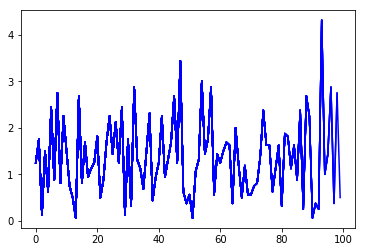

_____ mb 1 2020-01-31 01:46:19.047695
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 260)               5200      
_________________________________________________________________
batch_normalization_4 (Batch (None, 260)               1040      
_________________________________________________________________
dropout_4 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 260)               67860     
_________________________________________________________________
batch_normalization_5 (Batch (None, 260)               1040      
_________________________________________________________________
dropout_5 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_7 (Dense) 

Epoch 53/60
1000/1000 [==============================] - 0s 20us/step - loss: 5703.1494
Epoch 54/60
1000/1000 [==============================] - 0s 18us/step - loss: 5695.0234
Epoch 55/60
1000/1000 [==============================] - 0s 22us/step - loss: 5673.6665
Epoch 56/60
1000/1000 [==============================] - 0s 20us/step - loss: 5674.2026
Epoch 57/60
1000/1000 [==============================] - 0s 18us/step - loss: 5652.2051
Epoch 58/60
1000/1000 [==============================] - 0s 20us/step - loss: 5652.6104
Epoch 59/60
1000/1000 [==============================] - 0s 20us/step - loss: 5633.9614
Epoch 60/60
1000/1000 [==============================] - 0s 20us/step - loss: 5618.2427
Epoch 1/60
1000/1000 [==============================] - 0s 31us/step - loss: 5617.6782
Epoch 2/60
1000/1000 [==============================] - 0s 28us/step - loss: 5605.4482
Epoch 3/60
1000/1000 [==============================] - 0s 21us/step - loss: 5593.8394
Epoch 4/60
1000/1000 [=============

Epoch 27/60
1000/1000 [==============================] - 0s 17us/step - loss: 4547.6743
Epoch 28/60
1000/1000 [==============================] - 0s 16us/step - loss: 4559.1997
Epoch 29/60
1000/1000 [==============================] - 0s 17us/step - loss: 4535.3042
Epoch 30/60
1000/1000 [==============================] - 0s 18us/step - loss: 4511.5293
Epoch 31/60
1000/1000 [==============================] - 0s 18us/step - loss: 4507.7393
Epoch 32/60
1000/1000 [==============================] - 0s 17us/step - loss: 4491.5947
Epoch 33/60
1000/1000 [==============================] - 0s 16us/step - loss: 4471.0781
Epoch 34/60
1000/1000 [==============================] - 0s 18us/step - loss: 4460.9229
Epoch 35/60
1000/1000 [==============================] - 0s 16us/step - loss: 4451.7744
Epoch 36/60
1000/1000 [==============================] - 0s 17us/step - loss: 4435.3486
Epoch 37/60
1000/1000 [==============================] - 0s 16us/step - loss: 4431.8306
Epoch 38/60
1000/1000 [=========

Epoch 1/60
1000/1000 [==============================] - 0s 23us/step - loss: 3381.8452
Epoch 2/60
1000/1000 [==============================] - 0s 23us/step - loss: 3364.0989
Epoch 3/60
1000/1000 [==============================] - 0s 23us/step - loss: 3350.6418
Epoch 4/60
1000/1000 [==============================] - 0s 30us/step - loss: 3349.2925
Epoch 5/60
1000/1000 [==============================] - 0s 24us/step - loss: 3334.6299
Epoch 6/60
1000/1000 [==============================] - 0s 21us/step - loss: 3319.1392
Epoch 7/60
1000/1000 [==============================] - 0s 19us/step - loss: 3305.4656
Epoch 8/60
1000/1000 [==============================] - 0s 19us/step - loss: 3321.2756
Epoch 9/60
1000/1000 [==============================] - 0s 21us/step - loss: 3284.5530
Epoch 10/60
1000/1000 [==============================] - 0s 22us/step - loss: 3275.6399
Epoch 11/60
1000/1000 [==============================] - 0s 21us/step - loss: 3280.0295
Epoch 12/60
1000/1000 [==================

Epoch 35/60
1000/1000 [==============================] - 0s 18us/step - loss: 2318.4954
Epoch 36/60
1000/1000 [==============================] - 0s 18us/step - loss: 2287.4827
Epoch 37/60
1000/1000 [==============================] - 0s 16us/step - loss: 2311.0029
Epoch 38/60
1000/1000 [==============================] - 0s 15us/step - loss: 2282.7546
Epoch 39/60
1000/1000 [==============================] - 0s 16us/step - loss: 2270.4202
Epoch 40/60
1000/1000 [==============================] - 0s 17us/step - loss: 2262.6553
Epoch 41/60
1000/1000 [==============================] - 0s 17us/step - loss: 2255.6052
Epoch 42/60
1000/1000 [==============================] - 0s 18us/step - loss: 2248.7605
Epoch 43/60
1000/1000 [==============================] - 0s 18us/step - loss: 2242.1077
Epoch 44/60
1000/1000 [==============================] - 0s 17us/step - loss: 2232.6406
Epoch 45/60
1000/1000 [==============================] - 0s 16us/step - loss: 2201.8784
Epoch 46/60
1000/1000 [=========

Epoch 9/60
1000/1000 [==============================] - 0s 17us/step - loss: 1420.2429
Epoch 10/60
1000/1000 [==============================] - 0s 18us/step - loss: 1419.7968
Epoch 11/60
1000/1000 [==============================] - 0s 17us/step - loss: 1419.6744
Epoch 12/60
1000/1000 [==============================] - 0s 18us/step - loss: 1386.9197
Epoch 13/60
1000/1000 [==============================] - 0s 17us/step - loss: 1411.6401
Epoch 14/60
1000/1000 [==============================] - 0s 17us/step - loss: 1376.0985
Epoch 15/60
1000/1000 [==============================] - 0s 18us/step - loss: 1375.3965
Epoch 16/60
1000/1000 [==============================] - 0s 18us/step - loss: 1380.8622
Epoch 17/60
1000/1000 [==============================] - 0s 18us/step - loss: 1361.5852
Epoch 18/60
1000/1000 [==============================] - 0s 19us/step - loss: 1351.5514
Epoch 19/60
1000/1000 [==============================] - 0s 18us/step - loss: 1324.9757
Epoch 20/60
1000/1000 [==========

Epoch 43/60
1000/1000 [==============================] - 0s 29us/step - loss: 866.7866
Epoch 44/60
1000/1000 [==============================] - 0s 30us/step - loss: 850.2626
Epoch 45/60
1000/1000 [==============================] - 0s 28us/step - loss: 845.9975
Epoch 46/60
1000/1000 [==============================] - 0s 20us/step - loss: 850.1149
Epoch 47/60
1000/1000 [==============================] - 0s 19us/step - loss: 838.5577
Epoch 48/60
1000/1000 [==============================] - 0s 18us/step - loss: 828.7382
Epoch 49/60
1000/1000 [==============================] - 0s 16us/step - loss: 839.0045
Epoch 50/60
1000/1000 [==============================] - 0s 17us/step - loss: 833.8495
Epoch 51/60
1000/1000 [==============================] - 0s 18us/step - loss: 819.7051
Epoch 52/60
1000/1000 [==============================] - 0s 16us/step - loss: 842.0983
Epoch 53/60
1000/1000 [==============================] - 0s 17us/step - loss: 837.9963
Epoch 54/60
1000/1000 [====================

Epoch 2/2
1000/1000 [==============================] - 0s 20us/step - loss: 561.7756
Epoch 1/2
1000/1000 [==============================] - 0s 16us/step - loss: 534.0665
Epoch 2/2
1000/1000 [==============================] - 0s 17us/step - loss: 542.0040
self-test 4.849266432907033
episode: 3   score: 1.1875 1.453125   memory length: 1000   epsilon: 0.9048328935585562
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 591.4966
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 589.7040
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 601.3381
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 607.9916
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 611.6490
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 625.1371
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 613.3052
Epoch 2/2
500/500 [=============================

Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 553.6862
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 605.4174
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 578.6136
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 577.4175
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 560.1731
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 568.5905
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 547.0538
self-test 3.9133010916951285
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 537.4844
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 546.7549
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 563.0871
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 560.1669
Epoch 1/2
500/500 [==============================] - 0s 29

Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 523.3099
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 518.2845
Epoch 1/2
500/500 [==============================] - 0s 38us/step - loss: 511.2317
Epoch 2/2
500/500 [==============================] - 0s 32us/step - loss: 547.7513
Epoch 1/2
500/500 [==============================] - 0s 33us/step - loss: 514.3116
Epoch 2/2
500/500 [==============================] - 0s 36us/step - loss: 517.8085
Epoch 1/2
500/500 [==============================] - 0s 33us/step - loss: 511.7292
Epoch 2/2
500/500 [==============================] - 0s 32us/step - loss: 536.5164
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 523.8681
Epoch 2/2
500/500 [==============================] - 0s 31us/step - loss: 550.4987
self-test 3.414195505854851
Epoch 1/2
500/500 [==============================] - 0s 33us/step - loss: 477.8736
Epoch 2/2
500/500 [==============================] - 0s 33u

Epoch 1/2
500/500 [==============================] - 0s 32us/step - loss: 452.1098
Epoch 2/2
500/500 [==============================] - 0s 33us/step - loss: 425.3844
Epoch 1/2
500/500 [==============================] - 0s 32us/step - loss: 437.2660
Epoch 2/2
500/500 [==============================] - 0s 35us/step - loss: 432.0737
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 451.6139
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 446.2985
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 430.8998
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 460.8285
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 423.3594
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 390.5646
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 399.8544
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 416.9310
self

500/500 [==============================] - 0s 26us/step - loss: 551.7225
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 558.6240
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 547.4706
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 534.6914
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 553.3638
Epoch 1/2
500/500 [==============================] - 0s 31us/step - loss: 536.1102
Epoch 2/2
500/500 [==============================] - 0s 32us/step - loss: 538.3706
Epoch 1/2
500/500 [==============================] - 0s 34us/step - loss: 539.7073
Epoch 2/2
500/500 [==============================] - 0s 32us/step - loss: 540.8350
Epoch 1/2
500/500 [==============================] - 0s 31us/step - loss: 552.5992
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 538.0743
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 534.9142
Epoch 2/2
500/

500/500 [==============================] - 0s 26us/step - loss: 443.1106
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 439.0297
Epoch 1/2
500/500 [==============================] - 0s 62us/step - loss: 474.2163
Epoch 2/2
500/500 [==============================] - 0s 44us/step - loss: 452.9185
Epoch 1/2
500/500 [==============================] - 0s 38us/step - loss: 438.9902
Epoch 2/2
500/500 [==============================] - 0s 35us/step - loss: 419.8181
Epoch 1/2
500/500 [==============================] - 0s 28us/step - loss: 430.4256
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 445.1652
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 431.3442
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 445.9357
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 454.3787
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 406.3422
Epoch 1/2
500/

self-test 2.747183983758271
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 420.5165
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 432.4973
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 427.5061
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 429.1657
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 442.1941
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 425.5680
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 457.9447
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 442.7296
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 409.9021
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 407.3233
Epoch 1/2
500/500 [==============================] - 0s 33us/step - loss: 407.7704
Epoch 2/2
500/500 [==============================] - 0s 57u

Epoch 2/2
500/500 [==============================] - 0s 33us/step - loss: 389.2404
Epoch 1/2
500/500 [==============================] - 0s 31us/step - loss: 406.4793
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 404.4085
self-test 2.2331553683326772
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 478.8802
Epoch 2/2
500/500 [==============================] - 0s 31us/step - loss: 457.1810
Epoch 1/2
500/500 [==============================] - 0s 31us/step - loss: 438.7774
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 417.9094
Epoch 1/2
500/500 [==============================] - 0s 29us/step - loss: 445.4879
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 414.1016
Epoch 1/2
500/500 [==============================] - 0s 27us/step - loss: 466.4619
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 454.5669
Epoch 1/2
500/500 [==============================] - 0s 28

Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 402.4965
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 419.8913
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 412.5184
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 396.2460
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 396.1966
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 421.4221
self-test 2.4091062484416907
Epoch 1/2
500/500 [==============================] - 0s 39us/step - loss: 376.1615
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 374.8184
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 395.0322
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 377.6366
Epoch 1/2
500/500 [==============================] - 0s 37us/step - loss: 371.2150
Epoch 2/2
500/500 [==============================] - 0s 39

Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 336.1199
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 370.0551
Epoch 2/2
500/500 [==============================] - 0s 30us/step - loss: 341.0680
Epoch 1/2
500/500 [==============================] - 0s 52us/step - loss: 354.3982
Epoch 2/2
500/500 [==============================] - 0s 55us/step - loss: 365.9193
Epoch 1/2
500/500 [==============================] - 0s 39us/step - loss: 347.1248
Epoch 2/2
500/500 [==============================] - 0s 32us/step - loss: 346.8965
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 330.2129
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 340.3861
self-test 2.123740458012098
Epoch 1/2
500/500 [==============================] - 0s 33us/step - loss: 595.1774
Epoch 2/2
500/500 [==============================] - 0s 32us/step - loss: 567.5168
Epoch 1/2
500/500 [==============================] - 0s 31u

Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 435.1335
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 446.4033
Epoch 1/2
500/500 [==============================] - 0s 33us/step - loss: 405.5759
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 401.6107
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 391.7620
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 404.5868
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 410.7876
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 421.6120
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 397.1444
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 401.8469
Epoch 1/2
500/500 [==============================] - 0s 30us/step - loss: 416.6091
Epoch 2/2
500/500 [==============================] - 0s 29us/step - loss: 410.1449
self

Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 333.6175
self-test 1.4527545796666883
episode: 38   score: 0.4375 1.2916666666666667   memory length: 7000   epsilon: 0.37717396465825637
Epoch 1/1
6000/6000 [==============================] - 0s 17us/step - loss: 328.4834
self-test 1.563467360753565
episode: 39   score: 0.125 1.2625   memory length: 7000   epsilon: 0.3678610464329692
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 329.6656
self-test 1.6177876041128922
episode: 40   score: 0.1875 1.236280487804878   memory length: 7000   epsilon: 0.3587780763324145
hit
Epoch 1/1
6000/6000 [==============================] - 0s 14us/step - loss: 327.6560
self-test 1.4789904546228327
episode: 41   score: 1.25 1.2366071428571428   memory length: 7000   epsilon: 0.34991937663680617
Epoch 1/1
6000/6000 [==============================] - 0s 17us/step - loss: 346.9456
self-test 1.5217063329699578
episode: 42   score: 0.1875 1.212209302325581

hit
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 281.1349
self-test 1.257048557235638
episode: 77   score: 2.0 1.2195512820512822   memory length: 7000   epsilon: 0.14226019961602693
Epoch 1/1
6000/6000 [==============================] - 0s 24us/step - loss: 283.8531
self-test 1.1685025805494733
episode: 78   score: 1.0625 1.2175632911392404   memory length: 7000   epsilon: 0.13874760932645758
hit
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 261.1842
self-test 1.1148912502862893
episode: 79   score: 1.625 1.22265625   memory length: 7000   epsilon: 0.13532174948275888
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 274.8628
self-test 1.062802969957443
episode: 80   score: 1.0 1.2199074074074074   memory length: 7000   epsilon: 0.13198047859684914
hit
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 305.1728
self-test 1.141083728229916
episode: 81   score: 1.375 1.2217987

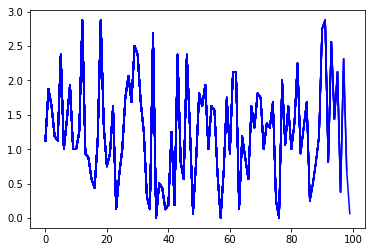

_____ mb 2 2020-01-31 09:20:23.684581
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 260)               5200      
_________________________________________________________________
batch_normalization_7 (Batch (None, 260)               1040      
_________________________________________________________________
dropout_7 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 260)               67860     
_________________________________________________________________
batch_normalization_8 (Batch (None, 260)               1040      
_________________________________________________________________
dropout_8 (Dropout)          (None, 260)               0         
_________________________________________________________________
dense_11 (Dense)

Epoch 53/60
1000/1000 [==============================] - 0s 17us/step - loss: 5960.5786
Epoch 54/60
1000/1000 [==============================] - 0s 15us/step - loss: 5941.8745
Epoch 55/60
1000/1000 [==============================] - 0s 15us/step - loss: 5936.9160
Epoch 56/60
1000/1000 [==============================] - 0s 20us/step - loss: 5934.3999
Epoch 57/60
1000/1000 [==============================] - 0s 15us/step - loss: 5913.9902
Epoch 58/60
1000/1000 [==============================] - 0s 16us/step - loss: 5895.1787
Epoch 59/60
1000/1000 [==============================] - 0s 15us/step - loss: 5880.3164
Epoch 60/60
1000/1000 [==============================] - 0s 15us/step - loss: 5871.5176
Epoch 1/60
1000/1000 [==============================] - 0s 15us/step - loss: 5865.2930
Epoch 2/60
1000/1000 [==============================] - 0s 16us/step - loss: 5840.5518
Epoch 3/60
1000/1000 [==============================] - 0s 16us/step - loss: 5840.2329
Epoch 4/60
1000/1000 [=============

Epoch 27/60
1000/1000 [==============================] - 0s 15us/step - loss: 4712.0215
Epoch 28/60
1000/1000 [==============================] - 0s 15us/step - loss: 4694.0127
Epoch 29/60
1000/1000 [==============================] - 0s 16us/step - loss: 4684.8989
Epoch 30/60
1000/1000 [==============================] - 0s 18us/step - loss: 4678.3408
Epoch 31/60
1000/1000 [==============================] - 0s 15us/step - loss: 4647.5864
Epoch 32/60
1000/1000 [==============================] - 0s 16us/step - loss: 4649.9487
Epoch 33/60
1000/1000 [==============================] - 0s 16us/step - loss: 4627.3252
Epoch 34/60
1000/1000 [==============================] - 0s 15us/step - loss: 4610.8394
Epoch 35/60
1000/1000 [==============================] - 0s 15us/step - loss: 4597.2114
Epoch 36/60
1000/1000 [==============================] - 0s 16us/step - loss: 4594.2319
Epoch 37/60
1000/1000 [==============================] - 0s 15us/step - loss: 4571.9922
Epoch 38/60
1000/1000 [=========

Epoch 1/60
1000/1000 [==============================] - 0s 16us/step - loss: 3454.4065
Epoch 2/60
1000/1000 [==============================] - 0s 16us/step - loss: 3425.6135
Epoch 3/60
1000/1000 [==============================] - 0s 16us/step - loss: 3418.0295
Epoch 4/60
1000/1000 [==============================] - 0s 16us/step - loss: 3397.9141
Epoch 5/60
1000/1000 [==============================] - 0s 16us/step - loss: 3398.0139
Epoch 6/60
1000/1000 [==============================] - 0s 16us/step - loss: 3365.5623
Epoch 7/60
1000/1000 [==============================] - 0s 15us/step - loss: 3359.8577
Epoch 8/60
1000/1000 [==============================] - 0s 15us/step - loss: 3351.5972
Epoch 9/60
1000/1000 [==============================] - 0s 16us/step - loss: 3329.5647
Epoch 10/60
1000/1000 [==============================] - 0s 15us/step - loss: 3323.8652
Epoch 11/60
1000/1000 [==============================] - 0s 16us/step - loss: 3318.4480
Epoch 12/60
1000/1000 [==================

Epoch 35/60
1000/1000 [==============================] - 0s 16us/step - loss: 2350.0481
Epoch 36/60
1000/1000 [==============================] - 0s 16us/step - loss: 2294.9023
Epoch 37/60
1000/1000 [==============================] - 0s 16us/step - loss: 2309.5090
Epoch 38/60
1000/1000 [==============================] - 0s 15us/step - loss: 2290.0488
Epoch 39/60
1000/1000 [==============================] - 0s 16us/step - loss: 2303.3835
Epoch 40/60
1000/1000 [==============================] - 0s 17us/step - loss: 2303.8289
Epoch 41/60
1000/1000 [==============================] - 0s 15us/step - loss: 2277.0796
Epoch 42/60
1000/1000 [==============================] - 0s 15us/step - loss: 2238.2185
Epoch 43/60
1000/1000 [==============================] - 0s 15us/step - loss: 2245.9414
Epoch 44/60
1000/1000 [==============================] - 0s 15us/step - loss: 2239.4526
Epoch 45/60
1000/1000 [==============================] - 0s 15us/step - loss: 2231.8127
Epoch 46/60
1000/1000 [=========

Epoch 9/60
1000/1000 [==============================] - 0s 15us/step - loss: 1500.2762
Epoch 10/60
1000/1000 [==============================] - 0s 17us/step - loss: 1473.0814
Epoch 11/60
1000/1000 [==============================] - 0s 16us/step - loss: 1454.7441
Epoch 12/60
1000/1000 [==============================] - 0s 16us/step - loss: 1440.6267
Epoch 13/60
1000/1000 [==============================] - 0s 16us/step - loss: 1453.6019
Epoch 14/60
1000/1000 [==============================] - 0s 16us/step - loss: 1462.6375
Epoch 15/60
1000/1000 [==============================] - 0s 15us/step - loss: 1445.3512
Epoch 16/60
1000/1000 [==============================] - 0s 15us/step - loss: 1482.2489
Epoch 17/60
1000/1000 [==============================] - 0s 16us/step - loss: 1416.2925
Epoch 18/60
1000/1000 [==============================] - 0s 16us/step - loss: 1428.6987
Epoch 19/60
1000/1000 [==============================] - 0s 16us/step - loss: 1407.6780
Epoch 20/60
1000/1000 [==========

Epoch 43/60
1000/1000 [==============================] - 0s 15us/step - loss: 954.0992
Epoch 44/60
1000/1000 [==============================] - 0s 17us/step - loss: 929.0534
Epoch 45/60
1000/1000 [==============================] - 0s 16us/step - loss: 903.8578
Epoch 46/60
1000/1000 [==============================] - 0s 15us/step - loss: 924.9460
Epoch 47/60
1000/1000 [==============================] - 0s 16us/step - loss: 920.3519
Epoch 48/60
1000/1000 [==============================] - 0s 15us/step - loss: 901.2003
Epoch 49/60
1000/1000 [==============================] - 0s 16us/step - loss: 908.2367
Epoch 50/60
1000/1000 [==============================] - 0s 17us/step - loss: 889.1109
Epoch 51/60
1000/1000 [==============================] - 0s 15us/step - loss: 904.6609
Epoch 52/60
1000/1000 [==============================] - 0s 15us/step - loss: 887.5226
Epoch 53/60
1000/1000 [==============================] - 0s 16us/step - loss: 910.5840
Epoch 54/60
1000/1000 [====================

Epoch 2/2
1000/1000 [==============================] - 0s 15us/step - loss: 651.1447
Epoch 1/2
1000/1000 [==============================] - 0s 16us/step - loss: 653.1104
Epoch 2/2
1000/1000 [==============================] - 0s 16us/step - loss: 641.5034
self-test 5.157996768252743
episode: 3   score: 0.8125 0.859375   memory length: 1000   epsilon: 0.9048328935585562
Epoch 1/2
500/500 [==============================] - 0s 41us/step - loss: 732.7997
Epoch 2/2
500/500 [==============================] - 0s 39us/step - loss: 792.2176
Epoch 1/2
500/500 [==============================] - 0s 33us/step - loss: 791.9036
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 709.7851
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 787.0463
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 720.5477
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 724.6509
Epoch 2/2
500/500 [=============================

Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 600.8896
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 617.1663
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 576.1562
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 596.1415
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 588.1127
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 592.4064
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 601.2575
self-test 4.5916865076124695
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 679.7971
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 634.4666
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 684.0514
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 672.4820
Epoch 1/2
500/500 [==============================] - 0s 24

Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 582.7020
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 617.6735
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 594.1320
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 596.4811
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 612.7933
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 618.0240
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 599.1985
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 591.0575
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 595.7394
self-test 3.6600830707167114
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 530.1777
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 528.1860
Epoch 1/2
500/500 [==============================] - 0s 25

Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 433.5757
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 444.3454
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 448.9196
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 462.1361
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 426.8724
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 438.3693
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 423.0132
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 423.9579
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 436.2241
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 438.8601
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 456.7498
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 421.7026
self

Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 551.5153
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 518.5214
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 547.8463
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 524.9469
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 522.3568
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 511.2765
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 506.1154
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 500.3911
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 516.1870
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 500.0132
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 511.1432
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 494.8565
Epoc

Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 533.2170
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 526.2311
Epoch 1/2
500/500 [==============================] - 0s 47us/step - loss: 546.4310
Epoch 2/2
500/500 [==============================] - 0s 46us/step - loss: 564.3893
Epoch 1/2
500/500 [==============================] - 0s 34us/step - loss: 516.4658
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 500.9503
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 510.3710
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 513.5527
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 516.0922
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 504.1742
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 505.3275
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 514.7810
Epoc

self-test 3.107298256184742
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 480.2909
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 490.2755
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 503.9023
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 490.0502
Epoch 1/2
500/500 [==============================] - 0s 43us/step - loss: 478.1100
Epoch 2/2
500/500 [==============================] - 0s 47us/step - loss: 475.5993
Epoch 1/2
500/500 [==============================] - 0s 45us/step - loss: 472.9440
Epoch 2/2
500/500 [==============================] - 0s 33us/step - loss: 458.4077
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 497.7016
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 484.9121
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 459.4068
Epoch 2/2
500/500 [==============================] - 0s 25u

Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 462.2021
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 471.3510
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 452.3611
self-test 2.6676494586361583
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 494.1388
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 536.7104
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 500.4066
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 506.2548
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 485.9859
Epoch 2/2
500/500 [==============================] - 0s 24us/step - loss: 503.9685
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 497.0357
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 476.7131
Epoch 1/2
500/500 [==============================] - 0s 25

Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 559.4150
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 544.3219
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 534.8992
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 549.4354
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 558.2026
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 555.5403
self-test 3.3192997199172405
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 544.0449
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 531.8275
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 521.6711
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 517.5673
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 510.0382
Epoch 2/2
500/500 [==============================] - 0s 24

Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 501.4604
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 518.0438
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 492.4453
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 503.8282
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 523.2410
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 471.3891
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 483.7797
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 500.9018
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 479.6066
self-test 3.0051235782663075
Epoch 1/2
500/500 [==============================] - 0s 25us/step - loss: 516.4474
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 493.6279
Epoch 1/2
500/500 [==============================] - 0s 25

Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 411.5321
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 405.6548
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 405.0795
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 393.9900
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 404.4549
Epoch 2/2
500/500 [==============================] - 0s 26us/step - loss: 421.0550
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 397.0299
Epoch 2/2
500/500 [==============================] - 0s 28us/step - loss: 384.2171
Epoch 1/2
500/500 [==============================] - 0s 26us/step - loss: 398.1732
Epoch 2/2
500/500 [==============================] - 0s 27us/step - loss: 386.2315
Epoch 1/2
500/500 [==============================] - 0s 24us/step - loss: 398.7369
Epoch 2/2
500/500 [==============================] - 0s 25us/step - loss: 399.9744
self

Epoch 1/1
6000/6000 [==============================] - 0s 13us/step - loss: 318.4293
self-test 1.3901171536044807
episode: 39   score: 0.0625 1.1921875   memory length: 7000   epsilon: 0.3678610464329692
hit
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 331.0898
self-test 1.4753599956044523
episode: 40   score: 2.0 1.211890243902439   memory length: 7000   epsilon: 0.3587780763324145
hit
Epoch 1/1
6000/6000 [==============================] - 0s 13us/step - loss: 322.0608
self-test 1.4404009393510135
episode: 41   score: 1.0625 1.2083333333333333   memory length: 7000   epsilon: 0.34991937663680617
hit
Epoch 1/1
6000/6000 [==============================] - 0s 13us/step - loss: 339.8414
self-test 1.6039030531513894
episode: 42   score: 1 1.2034883720930232   memory length: 7000   epsilon: 0.3412794098166824
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 328.9836
self-test 1.4973250686796387
episode: 43   score: 0.375 1.1846590909

hit
Epoch 1/1
6000/6000 [==============================] - 0s 12us/step - loss: 300.8316
self-test 1.1634148166616298
episode: 78   score: 1.1875 1.2832278481012658   memory length: 7000   epsilon: 0.13874760932645758
Epoch 1/1
6000/6000 [==============================] - 0s 13us/step - loss: 315.5199
self-test 1.262520264632626
episode: 79   score: 0.9375 1.27890625   memory length: 7000   epsilon: 0.13532174948275888


In [ ]:
#Проверь на зенитке, на cartpole и на mountain car

score_dict_full={'random':[],'ddqn':[],'a2c':[],'sarsa':[],'mb':[]}
border_med = 100
EPISODES=100
score_dict_med={'random':[],'ddqn':[],'a2c':[],'sarsa':[],'mb':[]}#c border_med по... такты. Надо, чтобы проверить быстроту обучения

agent_list=[random_agent.randomAgent,a2c.A2CAgent,ddqn.DoubleDQNAgent,sarsa.SarsaAgent,model_based.ModelBasedAgent]
for ag_num in range(4,5):
    if ag_num==0:
        name='random'
    if ag_num==1:
        name='a2c'
    if ag_num==2:
        name='ddqn' 
    if ag_num==3:
        name='sarsa'
    if ag_num==4:
        name='mb'
    
    for estimation in range(3):
        print('_____',name,estimation,pd.Timestamp.now())
        #здесь весь код от инициализации модели до выдачи scores. Но без рендера.
        # In case of CartPole-v1, maximum length of episode is 500
        
        env = aa_gun.AA_gun_simple0_env()
        #env = gym.make('Seaquest-ramNoFrameskip-v0')
        #env=CartPoleEnv9()
        # get size of state and action from environment
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n

        #agent = DoubleDQNAgent(state_size, action_size)
        agent = agent_list[ag_num](state_size, action_size)
        agent.train_start=1000
        #agent.train_start=7000
        agent.epsilon_decay=0.9999
        agent.render=False

        scores, episodes = [], []
        reward_lst = []
        s_list=[]
        a_list=[]

        for e in range(EPISODES):
            done = False
            score = 0
            state = env.reset()
            state = np.reshape(state, [1, state_size])

            while not done:
                #if (e in range(2,7)) or (e in range(20,25)) or (e in range(100,103)) or (e in range(200,202)) or (e in range(300,306)) or (e in range(400,406)) or (e in range(500,506)) or (e in range(600,604)):
                #    if agent.render:
                #        env.render()

                # get action for the current state and go one step in environment
                action = agent.get_action(state)
                next_state, reward, done, info = env.step(action)
                next_state = np.reshape(next_state, [1, state_size])
                # if an action make the episode end, then gives penalty of -100

                
                # save the sample <s, a, r, s'> to the replay memory
                agent.append_sample(state, action, reward, next_state, done)
                #if next_state[0,11]!=reward:
                #    print('state[13]!=reward',state[0,11],reward)
                #
                s_list.append(state)
                a_list.append(action)
                reward_lst.append(reward)
                #

                # every time step do the training
                agent.train_model()
                score += reward
                state = next_state

                if done:
                    # every episode update the target model to be same with model
                    agent.update_target_model()

                    # every episode, plot the play time
                    scores.append(score)
                    episodes.append(e)
                    pylab.plot(episodes, scores, 'b')
                    #pylab.savefig("./save_graph/aa_gun_dqn.png")
                    print("episode:", e, "  score:", score,np.mean(scores), "  memory length:",
                          len(agent.s), "  epsilon:", agent.epsilon)



            # save the model
            #if e % 50 == 0:
            #    agent.model.save_weights("./save_model/aa_gun_dqn.h5")



        #и первые 3000 тактов - это рандом
        #Ходов так 50
        score_dict_full[name].append(np.mean(scores))
        score_dict_med[name].append(np.mean(scores[border_med:]))
        import pickle
        f=open('score_dict.pkl','wb')
        pickle.dump([score_dict_full,score_dict_med],f)
        plt.show()

In [ ]:
score_dict_full